In [2]:
import numpy as np
import matplotlib.pyplot as plt

#######################################

# Sección de parámetros de entrada
B0 = 10.0
Bn = 10.0
L = 10.0
l = 0.5
b = 0.5
hk = 0.5  # Parámetro h/k
theta0 = 10.0
thetan = 10.0

########################################
N = 200   # Número de nodos


def B(B0,Bn,b,L,N):
    x = np.linspace(0,L,N)
    funcion = np.zeros(len(x))
    funcion[np.where(x<=L/3)]=1
    
   # funcion = 2*x**2 +2  
    if (min(funcion) != b/2) or funcion[0] != B0 or funcion[N-1] != Bn:
        print('Función No valida')
        return 0
    return x,funcion



    


66.66666666666667


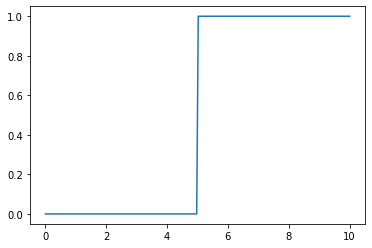

In [15]:

def c(x):
    funcion = np.zeros(len(x))
    print((len(x)/3))
    funcion[np.where(x>5)] = 1
    
    return funcion
plt.figure(1)
plt.plot(x,c(x))